# Importer les bibliothèques

In [74]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Charger les données

In [75]:
data = pd.read_csv("heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exploration initiale

In [76]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

# Nettoyage et préparation

In [77]:
print(f"Rows after removing duplicates: {len(data)}")
print(f"Duplicate rows: {data.duplicated().sum()}")

# Supprimer les lignes dupliquées
data = data.drop_duplicates()

print(f"Rows after removing duplicates: {len(data)}")

Rows after removing duplicates: 303
Duplicate rows: 0
Rows after removing duplicates: 303


In [78]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [79]:
# Remplacer les valeurs manquantes par la médiane de chaque colonne
data = data.fillna(data.median(numeric_only=True))
print("\nAprès suppression des valeurs manquantes :", data.isnull().sum())
# afficher pour confirmation
print("\naprès suppression :",data.isnull().sum())



Après suppression des valeurs manquantes : age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

après suppression : age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Analyse exploratoire approfondie

* Une matrice de corrélation visuelle (sns.heatmap) pour repérer les variables liées à la cible.

* Des boxplots pour visualiser la distribution des variables selon la classe cible.

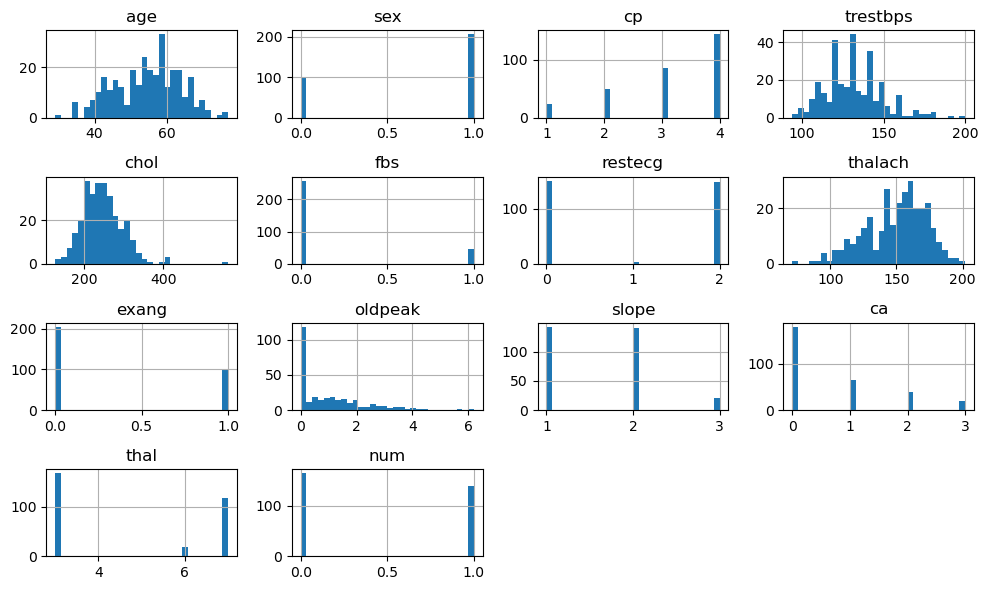

In [80]:
data.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

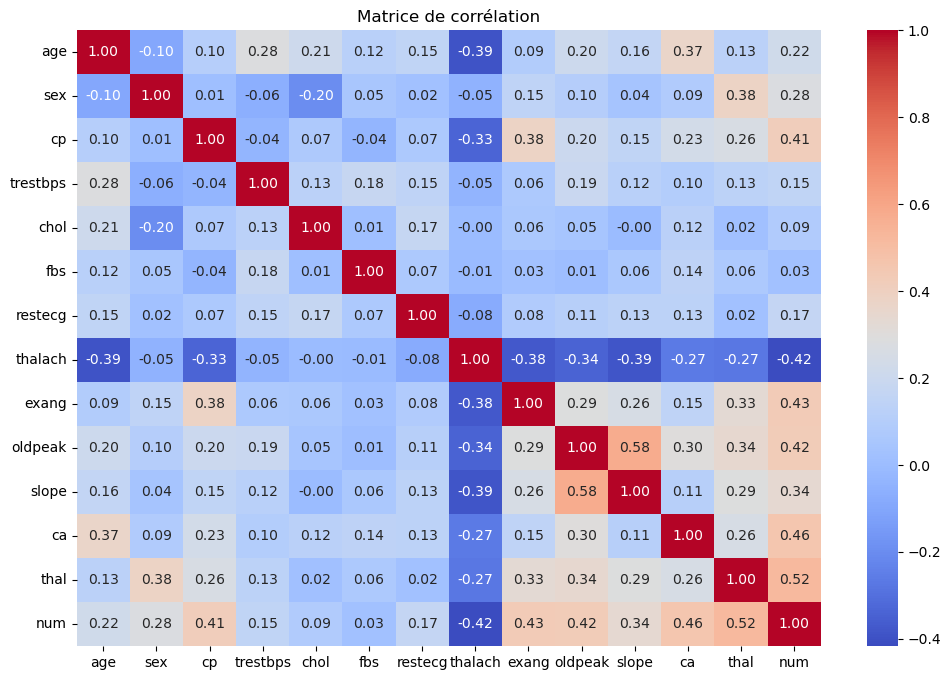

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

# Equilibre des classes
Vérifie si la variable cible est déséquilibrée.

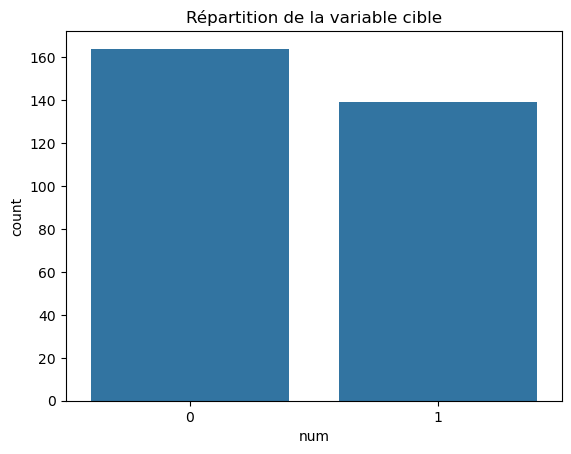

In [82]:
sns.countplot(x='num', data=data)
plt.title("Répartition de la variable cible")
plt.show()


# Partie normalisation et fit 

In [106]:
#X = data.drop('num', axis=1)  # Variables explicatives
X = data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sex', 'age']]
y = data['num'].apply(lambda x: 1 if x > 0 else 0)
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Ajout de la constante
X_train_final = sm.add_constant(X_train_scaled)
X_test_final = sm.add_constant(X_test_scaled)

#Ajustement du modèle logistique
model = sm.GLM(y_train, X_train_final, family=sm.families.Binomial())
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    num   No. Observations:                  212
Model:                            GLM   Df Residuals:                      202
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74.162
Date:                Wed, 16 Apr 2025   Deviance:                       148.32
Time:                        12:42:10   Pearson chi2:                     198.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4922
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0595      0.226     -0.263      0.7

## Prédiction 

## Avec . predict 

In [107]:
# Prédictions sur le test set
test_probs = results.predict(X_test_final)  # Probabilités prédites pour le test
test_preds = (test_probs > 0.5).astype(int)  # Conversion en classes (0/1)

#précison du modele
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, test_preds)
print(f"\nAccuracy sur le test set: {accuracy:.2f}")

# Évaluation du modèle
print("\nRapport de classification:")
print(classification_report(y_test, test_preds))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, test_preds))




Accuracy sur le test set: 0.84

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91


Matrice de confusion:
[[39  9]
 [ 6 37]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



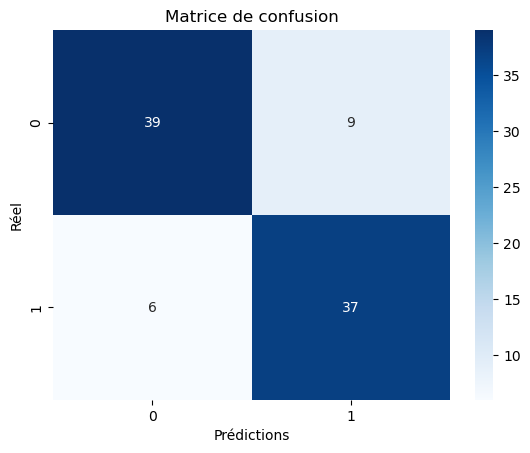

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(classification_report(y_test, test_preds))


cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

## Avec  **Fonction Log-Odds du Modèle Logistique**

La fonction est :

$$
\log\left(\frac{p}{1-p}\right) = Intercept + beta0 \times \text{X...} +...
$$



 

In [122]:
coefficients = results.params
coefficients

const   -0.059469
x1       0.421215
x2      -0.280682
x3       0.541794
x4       0.113284
x5       0.381924
x6       1.479856
x7       0.596920
x8       0.685631
x9       0.114436
dtype: float64

In [117]:
equation = f"logit(p) = {coefficients['const']:.4f}"
for key, value in coefficients.items():
    if key != 'const':  # On ne rajoute pas 'const' car il a déjà été ajouté
        equation += f" + ({value:.4f} * {key})"

print(equation)

logit(p) = -0.0595 + (0.4212 * x1) + (-0.2807 * x2) + (0.5418 * x3) + (0.1133 * x4) + (0.3819 * x5) + (1.4799 * x6) + (0.5969 * x7) + (0.6856 * x8) + (0.1144 * x9)


In [136]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Coefficients du modèle
coefficients = results.params

# Profils d'entrée (X)
profils = np.array([
    [3, 150, 0, 2.3, 0, 0, 1, 1, 63],
    [2, 180, 0, 1.0, 1, 2, 0, 0, 45],
    [0, 170, 1, 3.5, 2, 1, 2, 1, 55],
])

# Standardiser les variables (toutes sauf la constante qui est fixe)
profils_scaled = scaler.transform(profils[:, 1:])  # On exclut la colonne de constante

# Ajouter la colonne de constante (1) aux données standardisées
profils_scaled = np.hstack((np.ones((profils_scaled.shape[0], 1)), profils_scaled))

# Fonction pour calculer les logits et probabilités pour un profil donné
def predire_probabilite(profil_scaled, coefficients):
    logits = coefficients['const']  # Commence par la constante
    for idx, key in enumerate(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']):
        logits += coefficients[key] * profil_scaled[idx]  # On utilise profil_scaled pour chaque x

    # Calcul de la probabilité avec la fonction sigmoïde
    prob = 1 / (1 + np.exp(-logits))
    return prob

# Calcul des probabilités pour chaque profil
probabilites = [predire_probabilite(profil_scaled, coefficients) for profil_scaled in profils_scaled]

# Affichage des résultats
for i, prob in enumerate(probabilites):
    print(f"Profil {i+1}: Probabilité prédite = {prob:.2%}")

Profil 1: Probabilité prédite = 21.36%
Profil 2: Probabilité prédite = 37.86%
Profil 3: Probabilité prédite = 94.70%
